# 1. 의사결정나무(Decision Tree)

### 개념
1. 데이터를 분석하여 그들 사이의 패턴과 결과를 트리 구조로 모형화하여 나타내는 분류 및 예측 모형
2. 한 번에 하나씩의 설명변수를 사용하여 예측 가능한 규칙들의 집합을 생성하는 알고리즘
3. 질문을 던져서 대상을 좁혀나가는 마치 '스무고개'와 비슷한 개념

### 종류
1. 분류나무: 각 범주에 대한 가능성을 예측, 새로운 개체를 분류
2. 회귀나무: 타겟변수의 수치를 예측


### 모형의 장점
1. 시각화를 통해 쉽게 모형을 해석할 수 있음
2. 교호효과에 대한 해석이 비교적 쉬움
3. 변수 변환의 필요성이 없음
4. 이상치에 강함
5. 범주형과 연속형 변수를 모두 취급할 수 있음
6. 선형성, 정규성, 등분산성 등의 가정이 불필요함


### 모형의 단점
1. 연속형 타겟변수의 경우 예측 오류가 클 가능성이 있음
2. 모델의 성장에 상대적으로 많은 비용이 듦
3. 선형구조 변수 사이의 관계를 놓칠 수 있음

### 모형의 구조
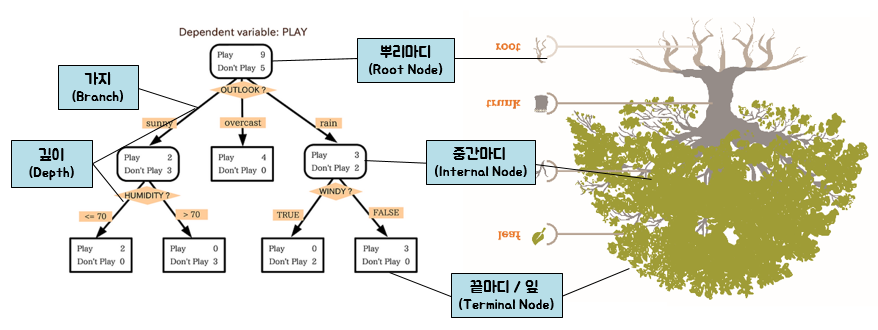

#### 나무를 뒤집어 놓은 형태

1) Root node: 분류가 시작되는 초기 지점  
2) Intermediate node: 분류가 이어지는 중간 지점  
3) Terminal node: 분류가 끝나는 마지막 지점

### 분석 단계

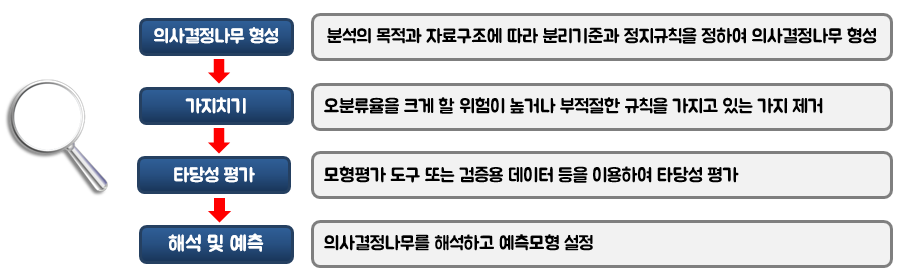

# 2. 분리 원리

### 재귀적 분할법  

 1) 재귀적: 하나의 루틴 내에서 다시 자신의 루틴을 호출하거나 자신이 호출한 서브루틴에 의해 자신이 재호출되는 루틴을 이용하여 진행 상태를 간직  
 2) 예측변수들의 k차원 공간을 서로 겹쳐짐 없는 다차원의 직사각형으로 나눔
 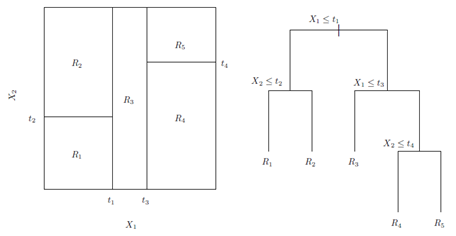 

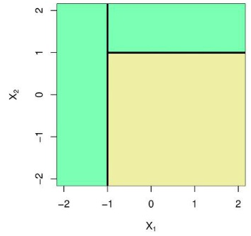

### 불순도의 감소  
1) 분리의 결과로 생기는 직사각형에서의 불순도를 최대한 감소시키는 방향으로 분리 진행  
2) 불순도의 측정지표
 - 범주형: 지니지수, 엔트로피, 카이제곱 통계량의 p-값 등  
  1. 지니지수 수식  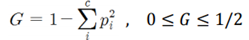

  2. 엔트로피 수식  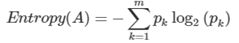

  3. 카이제곱 통계량 수식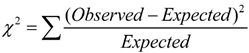  
  
  
 - 연속형: 분산의 감소량 등


### 데이터 분리의 의미
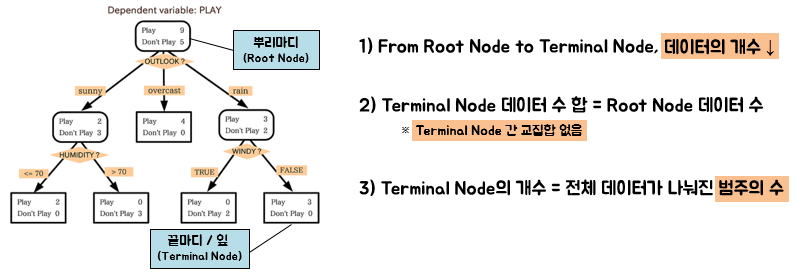

# 3. 과적합 방지 방법

### 정지규칙  
  1. 과적합이 발생하기 전에 의사결정나무의 성장을 중단  
  2. 여러가지 중단 기준 (의사결정나무의 Depth(분할 횟수), 노드 내 최소 관측치의 수 등)  
  3. 가장 연관성이 큰 예측변수가 통계적으로 유의한 개선 결과를 보이지 못하면 성장이 멈추며 모델이 종료됨  
  

### 가지치기
1. Full Tree의 경우 과적합 되기가 쉽고, 오류를 줄일 수 없는 약한 가지들은 제거되는 것이 좋음
2. 가지를 잘라내도 데이터는 제거되지 않음 (Terminal node를 적절하게 합쳐주는 개념)

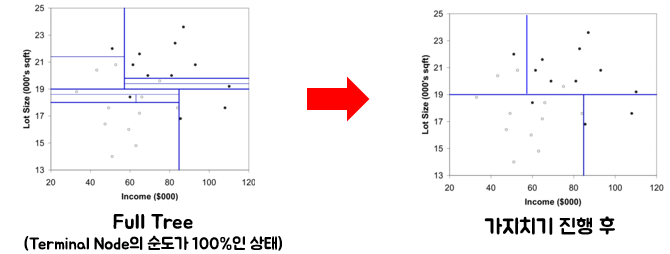

# 4. 실습

### 필요한 모듈 Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz
from matplotlib import pyplot

!pip install dmba
from dmba import plotDecisionTree, classificationSummary

!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

### 데이터 탐색

In [2]:
# https://www.kaggle.com/lowecoryr/universalbank
bank = pd.read_csv('UniversalBank.csv')

In [3]:
#5000행의 데이터셋
bank

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
#모든 변수가 정수형 또는 실수형으로 되어있음을 확인
bank.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [5]:
#Education, Personal Loan, Securities Account, CD Account, Online, CreditCard 변수는 범주형 변수이므로 형식 변경
#Education은 세 범주로 구성된 순서형 변수이지만, 범주형으로 변경하는 것이 더 적합할 것으로 판단함
bank['Education'] = bank['Education'].astype('str')
bank['Personal Loan'] = bank['Personal Loan'].astype('str')
bank['Securities Account'] = bank['Securities Account'].astype('str')
bank['CD Account'] = bank['CD Account'].astype('str')
bank['Online'] = bank['Online'].astype('str')
bank['CreditCard'] = bank['CreditCard'].astype('str')

In [6]:
#선택한 변수가 정범주형으로 변경되었음을 확인
bank.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education              object
Mortgage                int64
Personal Loan          object
Securities Account     object
CD Account             object
Online                 object
CreditCard             object
dtype: object

In [7]:
#모든 변수에 결측치가 없음을 확인
bank.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
#분석에 불필요하다고 판단되는 ID, ZIP Code 변수 제거
bank = bank.drop(['ID', 'ZIP Code'], axis=1)
bank

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


Text(0, 0.5, 'Frequency')

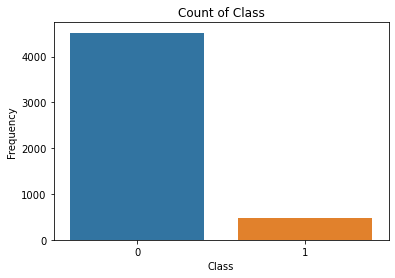

In [9]:
#범주형 타겟변수 변수 막대그래프 그리기
#0과 1의 불균형이 굉장히 심한 Imbalanced Data임을 확인

ax1 = plt.subplots()
ax1 = sns.countplot(bank['Personal Loan'])
ax1.set_title('Count of Class')
ax1.set_xlabel('Class')
ax1.set_ylabel('Frequency')

In [10]:
#타겟변수가 0이 4520, 1이 480개로 구성되어 있음을 확인
bank.groupby('Personal Loan').size()

Personal Loan
0    4520
1     480
dtype: int64

### Sampling 미진행 시

In [11]:
#Train:Test = 7:3으로 데이터 분할
y = bank['Personal Loan']
x = bank.drop('Personal Loan', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state = 502, shuffle=True, stratify=y)

In [12]:
#분리 기준으로 지니지수를 사용하는 의사결정나무의 Train 성능
Dtree = DecisionTreeClassifier(criterion="gini")
Dtree.fit(X_train, Y_train)
y_pred = Dtree.predict(X_train)
acc_Dtree = round(accuracy_score(y_pred, Y_train), 4)
print(acc_Dtree)

1.0


In [13]:
classificationSummary(Y_train, Dtree.predict(X_train))
print()

#민감도(Sensitivity): 실제로 1인 것 중에 1로 예측한 것의 비율
#특이도(Specificity): 실제로 0인 것 중에 0으로 예측한 것의 비율

cm = confusion_matrix(Y_train, y_pred)

sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity)

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 3164    0
     1    0  336

Sensitivity :  1.0
Specificity :  1.0


In [14]:
#분리 기준으로 지니지수를 사용하는 의사결정나무의 Test 성능
Dtree = DecisionTreeClassifier(criterion="gini")
Dtree.fit(X_train, Y_train)
y_pred = Dtree.predict(X_test)
acc_Dtree = round(accuracy_score(y_pred, Y_test), 4)
print(acc_Dtree)

0.986


In [15]:
classificationSummary(Y_test, Dtree.predict(X_test))
print()

#민감도(Sensitivity): 실제로 1인 것 중에 1로 예측한 것의 비율
#특이도(Specificity): 실제로 0인 것 중에 0으로 예측한 것의 비율

cm = confusion_matrix(Y_test, y_pred)

sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity)

Confusion Matrix (Accuracy 0.9860)

       Prediction
Actual    0    1
     0 1345   11
     1   10  134

Sensitivity :  0.9305555555555556
Specificity :  0.9918879056047197


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.961


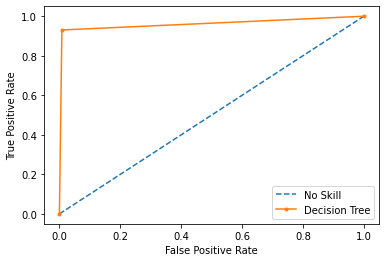

In [16]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]

# predict probabilities
lr_probs = Dtree.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
roc_curve(Y_test, ns_probs, pos_label='1')

# calculate roc curves
ns_fpr, ns_tpr, thresholds = roc_curve(Y_test, ns_probs, pos_label='1')
lr_fpr, lr_tpr, thresholds = roc_curve(Y_test, lr_probs, pos_label='1')

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

Sampling을 진행하지 않은 데이터를 7:3로 분할한 후 지니지수를 사용한 의사결정나무를 통해 분류 진행 시,

- 정확도: 0.9860
- 민감도: 0.9306
- 특이도: 0.9919
- AUC: 0.961

### SMOTE Sampling 진행 시

In [18]:
#Train:Test = 7:3으로 데이터 분할
y = bank['Personal Loan']
x = bank.drop('Personal Loan', axis=1)
X_train_sm, X_test_sm, Y_train_sm, Y_test_sm = train_test_split(x, y, test_size=0.3, random_state = 502, shuffle=True, stratify=y)

In [38]:
#소수 계급의 수를 다수 계급의 수만큼 새롭게 추가 생성하는 SMOTE Sampling 기법
X_train_sm, Y_train_sm = SMOTE(random_state=0).fit_resample(X_train_sm, Y_train_sm)

In [40]:
count0 = 0
count1 = 0
for i in range(len(Y_train_sm)):
    if Y_train_sm[i] == '0':
        count0 += 1
    else:
        count1 += 1

print('0: ', count0,'개  ', '1: ', count1,'개', sep='')

0: 3164개  1: 3164개


In [41]:
#분리 기준으로 지니지수를 사용하는 의사결정나무의 Train 성능
Dtree_sm = DecisionTreeClassifier(criterion="gini")
Dtree_sm.fit(X_train_sm, Y_train_sm)
y_pred_sm = Dtree_sm.predict(X_train_sm)
acc_Dtree_sm = round(accuracy_score(y_pred_sm, Y_train_sm), 4)
print(acc_Dtree_sm)

1.0


In [42]:
classificationSummary(Y_train_sm, Dtree_sm.predict(X_train_sm))
print()

#민감도(Sensitivity): 실제로 1인 것 중에 1로 예측한 것의 비율
#특이도(Specificity): 실제로 0인 것 중에 0으로 예측한 것의 비율

cm_sm = confusion_matrix(Y_train_sm, y_pred_sm)

sensitivity_sm = cm_sm[1,1]/(cm_sm[1,0]+cm_sm[1,1])
print('Sensitivity : ', sensitivity_sm )

specificity_sm = cm_sm[0,0]/(cm_sm[0,0]+cm_sm[0,1])
print('Specificity : ', specificity_sm)

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 3164    0
     1    0 3164

Sensitivity :  1.0
Specificity :  1.0


In [56]:
#분리 기준으로 지니지수를 사용하는 의사결정나무의 Test 성능
Dtree_sm = DecisionTreeClassifier(criterion="gini")
Dtree_sm.fit(X_train_sm, Y_train_sm)
y_pred_sm = Dtree_sm.predict(X_test_sm)
acc_Dtree_sm = round(accuracy_score(y_pred_sm, Y_test_sm), 4)
print(acc_Dtree_sm)

0.9787


In [44]:
classificationSummary(Y_test_sm, Dtree_sm.predict(X_test_sm))
print()

#민감도(Sensitivity): 실제로 1인 것 중에 1로 예측한 것의 비율
#특이도(Specificity): 실제로 0인 것 중에 0으로 예측한 것의 비율

cm_sm = confusion_matrix(Y_test_sm, y_pred_sm)

sensitivity_sm = cm_sm[1,1]/(cm_sm[1,0]+cm_sm[1,1])
print('Sensitivity : ', sensitivity_sm )

specificity_sm = cm_sm[0,0]/(cm_sm[0,0]+cm_sm[0,1])
print('Specificity : ', specificity_sm)

Confusion Matrix (Accuracy 0.9787)

       Prediction
Actual    0    1
     0 1332   24
     1    8  136

Sensitivity :  0.9444444444444444
Specificity :  0.9823008849557522


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.961


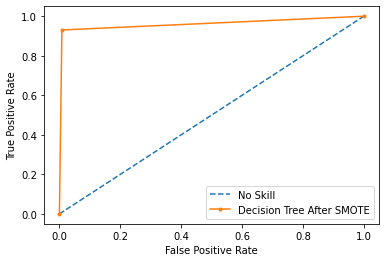

In [45]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test_sm))]

# predict probabilities
lr_probs = Dtree.predict_proba(X_test_sm)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(Y_test_sm, ns_probs)
lr_auc = roc_auc_score(Y_test_sm, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
roc_curve(Y_test_sm, ns_probs, pos_label='1')

# calculate roc curves
ns_fpr, ns_tpr, thresholds = roc_curve(Y_test_sm, ns_probs, pos_label='1')
lr_fpr, lr_tpr, thresholds = roc_curve(Y_test_sm, lr_probs, pos_label='1')

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree After SMOTE')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

SMOTE Sampling을 진행한 데이터를 7:3로 분할한 후 지니지수를 사용한 의사결정나무를 통해 분류 진행 시,

- 정확도: 0.9797
- 민감도: 0.9444
- 특이도: 0.9823
- AUC: 0.961

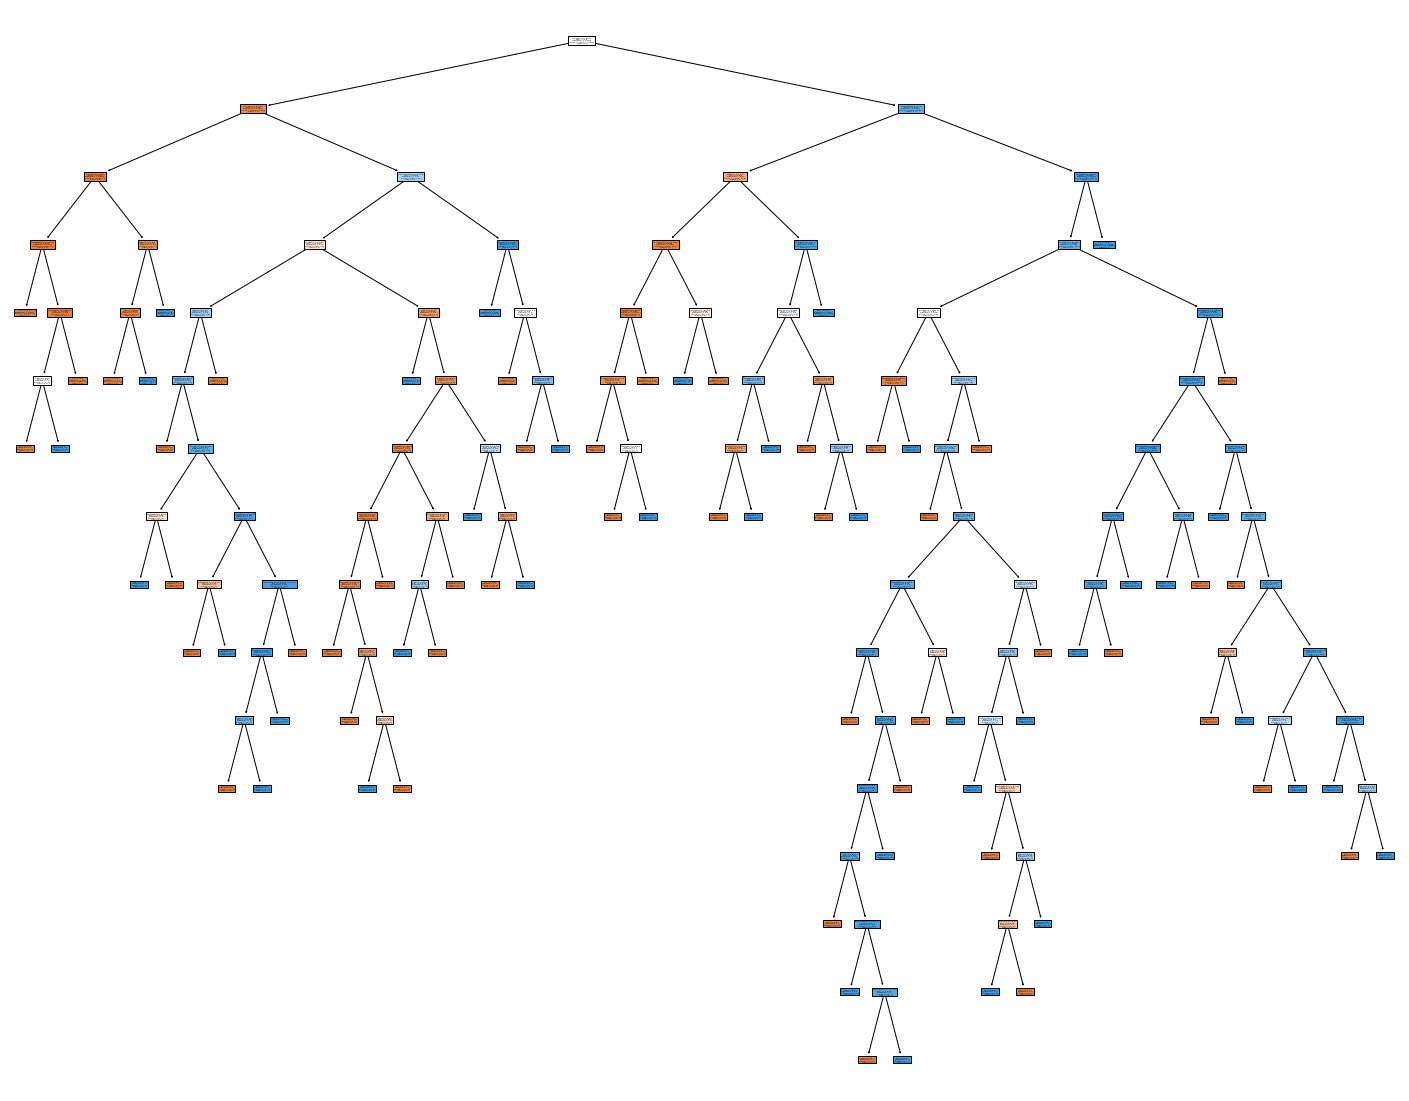

In [46]:
#SMOTE Sampling한 데이터로 생성한 의사결정나무는 너무 깊고 복잡함을 확인
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Dtree, 
                   feature_names=x.columns,
                   class_names=['0','1'],
                   filled=True)

In [63]:
#GridSearchCV를 통해 나무의 깊이, 최소 샘플 수 등의 파라미터의 최적값을 도출
param_grid_Ini = {
    'max_depth': [1, 5, 10, 20, 30, 40], 
    'min_samples_split': [1, 5, 10, 20, 40, 60, 80], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch_Ini = GridSearchCV(DecisionTreeClassifier(criterion="gini"), param_grid_Ini, cv=5, n_jobs=-1)
gridSearch_Ini.fit(X_train_sm, Y_train_sm)

print('Initial score: ',  gridSearch_Ini.best_score_)
print('Initial parameters: ', gridSearch_Ini.best_params_)

Initial score:  0.9851459578267738
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 5}


In [66]:
# 최적의 파라미터를 통해 의사결정나무를 생성
param_grid_Imp = {
    'max_depth': [i for i in range(5, 15)], 
    'min_samples_split': [j for j in range(1,10)], 
    'min_impurity_decrease': [0, 0.00001, 0.00002],
}
gridSearch_Imp = GridSearchCV(DecisionTreeClassifier(criterion="gini"), param_grid_Imp, cv=5, n_jobs=-1)
gridSearch_Imp.fit(X_train_sm, Y_train_sm)

print('Improved score: ', gridSearch_Imp.best_score_)
print('Improved parameters: ', gridSearch_Imp.best_params_)

Improved score:  0.9868847136104503
Improved parameters:  {'max_depth': 13, 'min_impurity_decrease': 2e-05, 'min_samples_split': 2}


In [67]:
bestClassTree = gridSearch_Imp.best_estimator_
bestClassTree.fit(X_train_sm, Y_train_sm)
y_pred_bc = bestClassTree.predict(X_test_sm)
acc_cart_stop = round(accuracy_score(y_pred_bc, Y_test_sm), 4)
print(acc_cart_stop)

0.9773


In [73]:
classificationSummary(Y_test_sm, bestClassTree.predict(X_test_sm))
print()

#민감도(Sensitivity): 실제로 1인 것 중에 1로 예측한 것의 비율
#특이도(Specificity): 실제로 0인 것 중에 0으로 예측한 것의 비율

cm_sm = confusion_matrix(Y_test_sm, y_pred_bc)

sensitivity_sm = cm_sm[1,1]/(cm_sm[1,0]+cm_sm[1,1])
print('Sensitivity : ', sensitivity_sm )

specificity_sm = cm_sm[0,0]/(cm_sm[0,0]+cm_sm[0,1])
print('Specificity : ', specificity_sm)

Confusion Matrix (Accuracy 0.9773)

       Prediction
Actual    0    1
     0 1330   26
     1    8  136

Sensitivity :  0.9444444444444444
Specificity :  0.9808259587020649


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.947


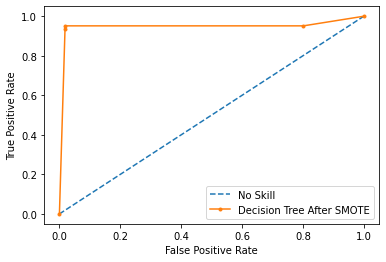

In [72]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test_sm))]

# predict probabilities
lr_probs = bestClassTree.predict_proba(X_test_sm)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(Y_test_sm, ns_probs)
lr_auc = roc_auc_score(Y_test_sm, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
roc_curve(Y_test_sm, ns_probs, pos_label='1')

# calculate roc curves
ns_fpr, ns_tpr, thresholds = roc_curve(Y_test_sm, ns_probs, pos_label='1')
lr_fpr, lr_tpr, thresholds = roc_curve(Y_test_sm, lr_probs, pos_label='1')

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree After SMOTE')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

SMOTE Sampling을 진행한 데이터를 7:3로 분할한 후 지니지수를 사용한 의사결정나무를 통해 분류 진행 시,

- 정확도: 0.9773
- 민감도: 0.9444
- 특이도: 0.9808
- AUC: 0.947

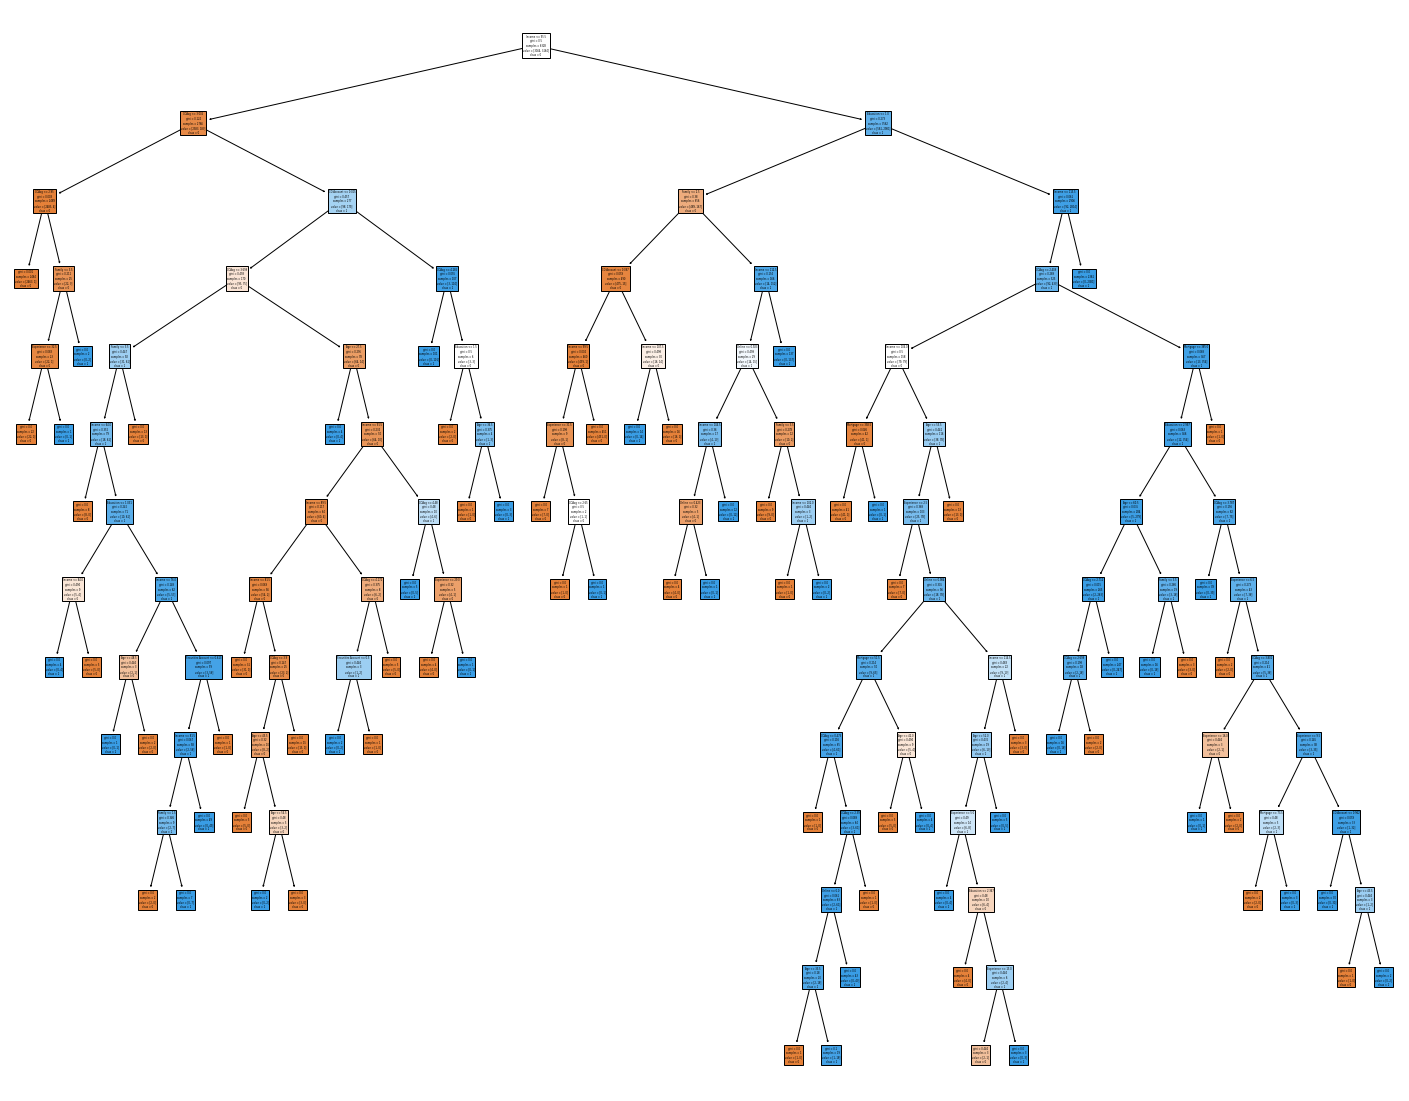

In [69]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(bestClassTree, 
                   feature_names=X_test_sm.columns,  
                    class_names=['0','1'],
                   filled=True)

### 결론

#### 실습에 사용한 데이터는 개인 대출 데이터로, 대출을 보유한 경우인 1을 정확하게 예측하는 것이 0을 예측하는 것보다 더 중요하다.

계급 불균형이 심한 데이터이므로 SMOTE Sampling을 진행하여 민감도를 높여주었다. 추가로, 가지치기 결과 모델이 눈에 띄게 단순해지지는 않았지만 깊이적인 측면에서 2층 정도가 얕아졌음을 확인할 수 있었다. 가지치기를 진행하기 전과 후에 성능면에서 차이가 크지 않은 수준이었기 때문에 가지가 성공적으로 잘 쳐졌다고 생각한다.